In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/drive/MyDrive/Praktikum ML/Praktikum12/Data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df_clean = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

X = df_clean.drop(columns=['diagnosis'])
y = df_clean['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained = pca.explained_variance_ratio_
explained


array([0.44272026, 0.18971182])

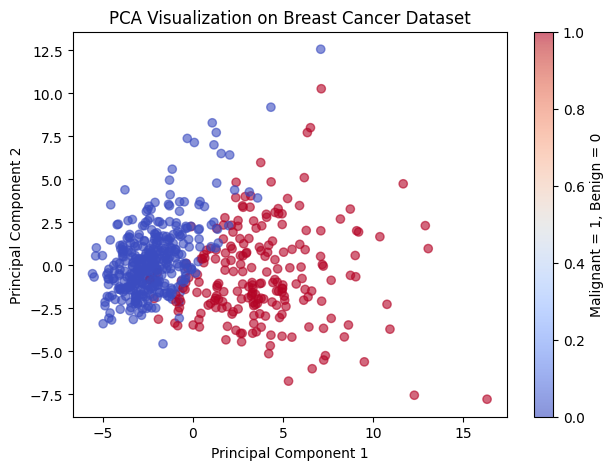

In [24]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=(y=="M"), cmap='coolwarm', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization on Breast Cancer Dataset")
plt.colorbar(label="Malignant = 1, Benign = 0")
plt.show()


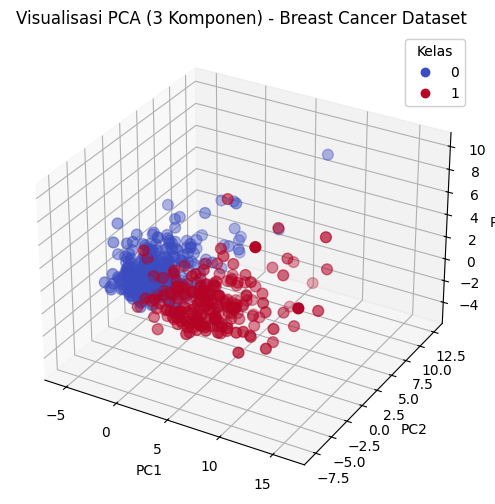

In [23]:
pca3 = PCA(n_components=3)
X_train_pca = pca3.fit_transform(X_scaled)

y_numerical = y.map({'M': 1, 'B': 0})

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    X_train_pca[:, 2],
    c=y_numerical,
    cmap='coolwarm',
    s=60
)

ax.set_title('Visualisasi PCA (3 Komponen) - Breast Cancer Dataset')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

legend1 = ax.legend(
    *scatter.legend_elements(),
    title="Kelas"
)
ax.add_artist(legend1)

plt.show()